In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import datasets

In [15]:
#Load data
data = datasets.load_breast_cancer()
X = data['data']
y = data['target']


In [16]:
np.random.seed(0)
m,n = X.shape
theta = np.random.randn(n) #random initialization of theta

#add bias terms to X and theta
X_with_bias = np.c_[np.ones(m),X] 
theta_with_bias = np.insert(theta,0,0)


In [17]:
#Split Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_with_bias,y,random_state = 42)


In [18]:
#Scaling X

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
#Define Sigmoid function
def sigmoid(x):
    z = 1/(1 + np.exp(-x)) 
    return z


In [20]:
##Function for training data
def log_reg(theta,X,y,alpha):
    cost = []
    for i in range(5000):
        h = np.dot(theta,X.T)
        z = sigmoid(h)    
        J = (-1/m)*np.sum(y*np.log(z)+(1-z)*np.log(1-z))
        cost.append(J)
        error = z - y
        grad = (1/m)*np.sum(error*X.T)
        theta =  theta - grad*alpha
    pred = (z>=0.5).astype(int)
    return pred,theta,cost,z

In [21]:
#Training the data
pred_train, theta,cost,z = log_reg(theta_with_bias,X_train_scaled,y_train,0.01)


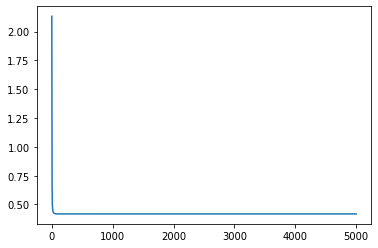

In [22]:
#Plotting Cost FUnction to see if it is working properly
plt.plot(cost)
plt.show()

In [23]:
from sklearn.metrics import accuracy_score

In [27]:
test_pred = sigmoid(np.dot(theta,X_test_scaled.T))
test_pred = (test_pred>=0.5).astype(int)

In [28]:
acc_train = accuracy_score(y_train,pred_train)
acc_train

0.8192488262910798

In [29]:
acc_test = accuracy_score(y_test,test_pred)
acc_test

0.8881118881118881